<a href="https://colab.research.google.com/github/ConstanceAwino/ConstanceAwino/blob/main/data_analysis_pandas_new_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flight delays- Data Exploration and Analysis with Pandas

Problem: Our dataset contains data from the Bureau of the United States of transportation about the arrival, delay, and cancellation of domestic flights from July 2019 to July 2022. We will investigate and highlight which airlines and airports have the most delay and cancellation over time. We will also analyse the causes of the delays and cancellation.

## 1-Data Exploration
The first step of any data analysis is to explore your data with key Pandas commands:

Import the Pandas library only onced in your script:


In [ ]:
#put you code below:
import pandas as pd

The dataset has 3 CSV files, let's import them all one by one, named them df1 to df3:

In [ ]:
#put you code below:
df1 = pd.read_csv("Flights_Delay_Cause_2019-2020.csv")
df2 = pd.read_csv("Flights_Delay_Cause_2020-2021.csv")
df3 = pd.read_csv("Flights_Delay_Cause_2021-2022.csv")

The dataset contains data from US domestic flights from July 2019 to July 2022, and consists of the following fields:

- year: the year of the flight
- month: the month of the flight
- carrier: the 2 letters abbreviation for the airline
- carrier_name: the complete name of the airline
- airport: the 3 letters Airport code
- airport_name: the airport full name
- arr_flights: number of arrived flights ontime
- arr_del15: number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)
- arr_cancelled: number of cancelled flights
- arr_diverted: number of diverted flights
- arr_delay: number of delayed flights
- carrier_delay: number of flights delayed caused by the carrier
- weather_delay: number of flights delayed caused by the weather
- nas_delay: number of flighst delayed caused by the National Aviation System
- security_delay: number of flights delayed due to security issues


Let's explore the 5 first rows of the dataframe named df1:


In [ ]:
#put you code below:
df1.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0


Similarly, explore the 5 last rows of df1:

In [ ]:
#put you code below:
df1.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0
1679,2022,7,YX,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas Regional",56.0,13.0,3.0,0.0,1180.0,120.0,0.0,318.0,0.0


Since our dataset has 3 CSV files, for convenience let's combine all files in one document
using the .concat() method, explore the official documentation of the .concat() method to find out
how to use it properly, read examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html


In [ ]:
#put you code below, make sure the index of the combined dataset is starting from 0:
df4 = pd.concat([df1, df2, df3], ignore_index=True)
df4

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42456,2020,8,YV,Mesa Airlines Inc.,TUS,"Tucson, AZ: Tucson International",62.0,5.0,2.0,0.0,497.0,350.0,0.0,91.0,0.0
42457,2020,8,YV,Mesa Airlines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",40.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42458,2020,8,YV,Mesa Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",54.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
42459,2020,8,YX,Republic Airline,ACK,"Nantucket, MA: Nantucket Memorial",64.0,3.0,0.0,0.0,115.0,0.0,19.0,38.0,0.0


Let's explore the first few rows of the whole dataset:

In [ ]:
#put you code below:
df4.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0


How many rows and columns the dataset has?


In [ ]:
#put you code below:
df4.shape


(42461, 15)

Use the .info() medthod to finds out the number of rows and columns, the data types of each columns, the number of non-missing values (non-null), memory usage. Columns that contains strings datat (or mixed datatypes) will be recognised as Object in Pandas.

In [ ]:
#put you code below:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 4.9+ MB


Make sure to check whether columns containing numerical values need to be converted as numeric for proper downstream analyses.

Alternatively, we can use the attribute shape to have only returned the number of rows and columns:

In [ ]:
#put you code below:
df4.shape


(42461, 15)

The attribute dtypes will return only the data types of each column:

In [ ]:
#put you code below:
df4.dtypes


year                int64
month               int64
carrier            object
carrier_name       object
airport            object
airport_name       object
arr_flights       float64
arr_del15         float64
arr_cancelled     float64
arr_diverted      float64
arr_delay         float64
carrier_delay     float64
weather_delay     float64
nas_delay         float64
security_delay    float64
dtype: object

We can quickly run some statistics with the describe() function:

In [ ]:
#put you code below:
df4.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
count,42461.000000,42461.000000,42354.000000,42183.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000
mean,2020.096324,6.529521,290.053950,41.470095,9.251641,0.624357,2757.859210,1007.217996,177.938495,582.413656,6.496647
std,0.815651,3.341909,836.485771,130.737062,70.613366,3.069780,9664.845862,3405.101443,742.131883,2610.575882,45.371314
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,33.000000,3.000000,0.000000,0.000000,158.000000,49.000000,0.000000,9.000000,0.000000
50%,2020.000000,7.000000,81.000000,10.000000,0.000000,0.000000,566.000000,211.000000,0.000000,80.000000,0.000000
75%,2021.000000,9.000000,194.000000,28.000000,3.000000,0.000000,1737.000000,705.000000,99.000000,282.000000,0.000000
max,2022.000000,12.000000,21873.000000,3506.000000,4951.000000,154.000000,305694.000000,119425.000000,26428.000000,88311.000000,3760.000000


Note: the 'year' and 'month' columns are seen as numerical values (they have the float datatype, as seen with the info() function). Hence, they will appear in the summary stats when using the describe() function. We would need to assigned to both the datetime datatype to be properly seen as dates.

## 2.Data tranformation:

After exploring the dataset variables, some data transformation might be needed.

From the previous method used .info() we could see that the year and month are both float data types. To work efficiently with dates in Pandas, they need to be converted into a date datatype. This is done by using the .todatetime() method as followed:

Before doing any modications to our dataframe, we will create a copy to not modify yet the original dataset in case we insert an error and cannot remove it. If you make an error in the original dataset without creating a copy you will need to restart the Python intrepreter to clear data in memory and re-run your script from the start.

In [ ]:
df_copy= df4.copy(deep=True)

We could convert the year and month directly to date datatype but by default, the function will give us a day and month number associated to each date, which is not what we want to insert a wrong day and month

In [ ]:
df_copy['year'] = pd.to_datetime(df_copy['year'], format='%Y')
df_copy['month'] = pd.to_datetime(df_copy['month'], format='%m')
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,2022-01-01,1900-07-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,2022-01-01-07
1,2022-01-01,1900-07-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,2022-01-01-07
2,2022-01-01,1900-07-01,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,2022-01-01-07
3,2022-01-01,1900-07-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,2022-01-01-07
4,2022-01-01,1900-07-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,2022-01-01-07


We can create a new column named "date" to store the date which will have the "month" and "year" from our dataset. We can concatenate our 2 columns month and year using the "+" sign:

In [ ]:
df_copy['date'] = df_copy['year'].astype(str) + '-' + df_copy['month'].dt.strftime('%m')
df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y-%m')
df_copy.head()

ValueError: time data "2022-01-01-07" at position 0 doesn't match format specified

It looks like our new date column contain the wrong date in it, this is because the month has been added to the year since they are both integers data types!
To overcome this problem, we need to change the month and year datatypes to a string.
The .astype() method is used to cast pandas datatype to others:

In [ ]:
#First, let's convert the month and year into a string datatype so we can concatenate them afterall:
#We need to use the .astype() methodf to convert data in Pandas
df_copy=df_copy.astype({"month": str, "year":str, "date":str})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  object 
 1   month           42461 non-null  object 
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  date            42461 non-null  object 
dtypes: float64(9), object(7)
memory usage: 5.2+ MB


Now our month and year column have been well transformed to a string data type called object in Pandas

In [ ]:
#alternative method to convert datatypes in Pandas:
df_copy['month'].astype(str)
df_copy['year'].astype(str)
df_copy['date'].astype(str)

0        1970-01-01 00:00:00.000002-07:00
1        1970-01-01 00:00:00.000002-07:00
2        1970-01-01 00:00:00.000002-07:00
3        1970-01-01 00:00:00.000002-07:00
4        1970-01-01 00:00:00.000002-07:00
                       ...               
42456    1970-01-01 00:00:00.000002-08:00
42457    1970-01-01 00:00:00.000002-08:00
42458    1970-01-01 00:00:00.000002-08:00
42459    1970-01-01 00:00:00.000002-08:00
42460    1970-01-01 00:00:00.000002-08:00
Name: date, Length: 42461, dtype: object

In [ ]:
df_copy['date']= df_copy['year']+"-"+df_copy['month']
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,1970-01-01 00:00:00.000002022-1900-07-01
1,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,1970-01-01 00:00:00.000002022-1900-07-01
2,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,1970-01-01 00:00:00.000002022-1900-07-01
3,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,1970-01-01 00:00:00.000002022-1900-07-01
4,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,1970-01-01 00:00:00.000002022-1900-07-01


Now our new column named date have the right format with the year followed by the month.


Using the Pandas function .to_datetime() we can transform at once the date into a datetime datatype:

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype                                
---  ------          --------------  -----                                
 0   year            42461 non-null  object                               
 1   month           42461 non-null  object                               
 2   carrier         42461 non-null  object                               
 3   carrier_name    42445 non-null  object                               
 4   airport         42461 non-null  object                               
 5   airport_name    42461 non-null  object                               
 6   arr_flights     42354 non-null  float64                              
 7   arr_del15       42183 non-null  float64                              
 8   arr_cancelled   42354 non-null  float64                              
 9   arr_diverted    42354 non-null  float64                      

In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,1970-01-01 00:00:00.000002-01:00
1,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,1970-01-01 00:00:00.000002-01:00
2,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,1970-01-01 00:00:00.000002-01:00
3,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,1970-01-01 00:00:00.000002-01:00
4,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,1970-01-01 00:00:00.000002-01:00


We can see from the column 'data' that we could assign datatime as datatype to the 'date' column, but doing this we also introduced by default a day number, here '01'. To overcome this we would beed to use an additonal function to get only the month and the year with a correct date format.

In [ ]:
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')
#.dt.to_period('M') converts the datetime values into a PeriodIndex with a monthly frequency (period)

<ipython-input-36-7c74e0ca3e5b>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')


In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,1970-01
1,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,1970-01
2,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,1970-01
3,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,1970-01
4,1970-01-01 00:00:00.000002022,1900-07-01,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,1970-01


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  date            42461 non-null  period[M]
dtypes: float64(9), object(6), period[M](1)
m

The 'date' column was assigned the 'period' datatype which is another date fromat used in pandas.

Our new column "date" as been well created. Let's save it in our working folder:

In [ ]:
df_copy.to_csv('flights_dataset.csv')

Note: in the event you work with a dataset that has a column containing the full date named "date" for instance, you can set the date column to the datatype datetime directly when importing your dataset with Pandas using the argument "parse_dates" when calling the Pandas function such as: df=pd.read_csv("datafile", parse_dates=["date"])
This will give you a date format with days, months, and years by default

Let's removed unwanted columns, the month and year columns, using the medthod .drop():

In [ ]:
#put you code below:
df_copy = df_copy.drop(columns=['month', 'year'])


The columns month and year has been well removed.

## 3-Data Cleaning
The next step after exploring our dataset and correct some of the datatypes we did would be to clean the dataset

Let's check how many missing values our dataset has using the isnull() and sum() function:

In [ ]:
#put you code below:
df_copy.isnull().sum()

carrier             0
carrier_name       16
airport             0
airport_name        0
arr_flights       107
arr_del15         278
arr_cancelled     107
arr_diverted      107
arr_delay         107
carrier_delay     107
weather_delay     107
nas_delay         107
security_delay    107
date                0
dtype: int64

We can see see that missing values are presents in columns associated with numerical values and also in the carrier name. Missing data from the columns that contain important information on the name of the carrier or arilaine names that we are not able to identify can cause issues in our downstream analysis. We will me removed those for now since we cannot identify them.
Replacing missing values should always be case specific!

let's remove missing values from the carrier name:

In [ ]:
#put you code below:
df_copy.dropna(inplace=True)

Let's verify the dataframe don't have any missing values left:

In [ ]:
#put you code below:
df_copy.isnull().sum()

carrier           0
carrier_name      0
airport           0
airport_name      0
arr_flights       0
arr_del15         0
arr_cancelled     0
arr_diverted      0
arr_delay         0
carrier_delay     0
weather_delay     0
nas_delay         0
security_delay    0
date              0
dtype: int64

### Let's check the distribution of the data:

if you don't recall the name of the variables, use the following command to quickly get their names:

In [ ]:
df_copy.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'date'],
      dtype='object')

We can check the data distribution to see if we get outliers in columns with numerical values using the built-in box_plot function in Pandas:

we apply the method .box_plot to our dataframe named "df"

In [ ]:
%matplotlib inline

<Axes: >

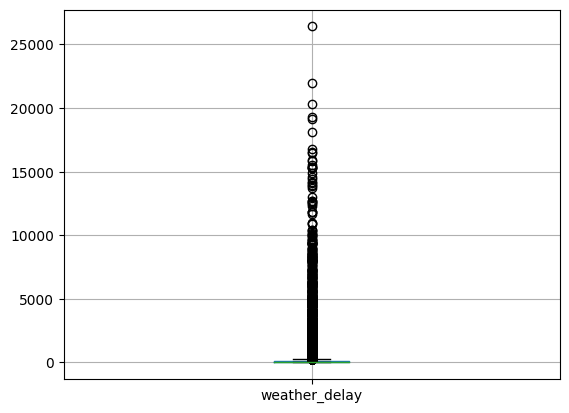

In [ ]:
df_copy.boxplot("weather_delay")

let's reuse the boxplot using a function:

In [ ]:
#We create a function that will return a box plot:
def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

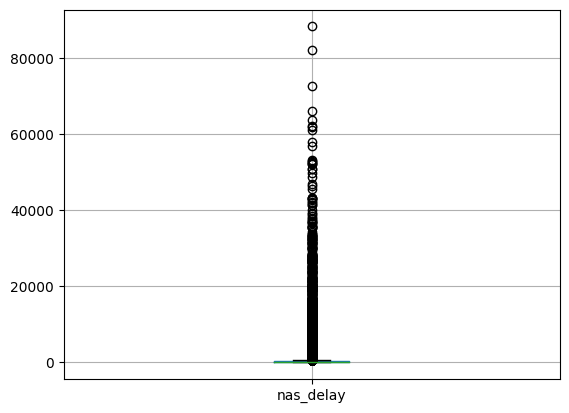

In [ ]:
#We call our function passing a data variable as argument:
box_plot('nas_delay')

Call the function again to check other variables.

In [ ]:
# Identify and remove the row with the outlier
outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [ ]:
outlier_index # we used the .index attribute to get the row number of our outlier

Int64Index([], dtype='int64')

<Axes: >

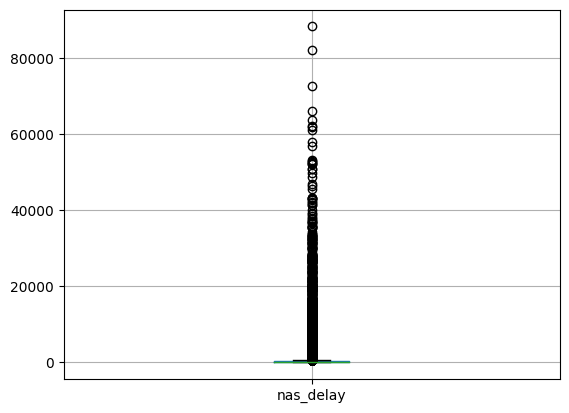

In [ ]:
df_cleaned.boxplot('nas_delay')

We can see from the above boxplot that the outliser has been well removed.

Using the Python Matplotlib visualisation library, we can plot several plots at once using the subplots() function:

Let's import the Matplotlib library to use it

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

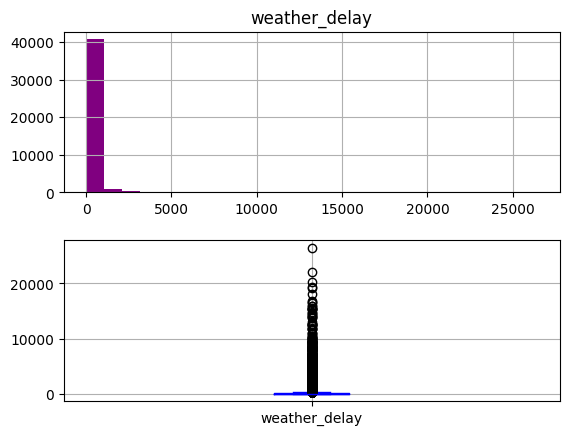

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=1) # subplot layer has 2 rows an 1 column which means 2 figures
df_cleaned.hist('weather_delay',ax=ax[0], bins=25, color="purple")
df_cleaned.boxplot("weather_delay",ax=ax[1], color="blue")


Same as before, but saved into a function to reuse:

In [ ]:
def subplot_function(data1, data2):  # I added one parameter per plot
    figure, ax = plt.subplots(nrows=2, ncols=1)

    # Get statistics
    min_val= df_cleaned[data1].min()
    max_val= df_cleaned[data1].max()
    mean_val= df_cleaned[data1].mean()
    med_val= df_cleaned[data1].median()

    # Add lines for the min, mean and median, and max
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'blue', linestyle='dashed', linewidth = 2)

    #Change labels- 1st plot
    ax[0].set_ylabel('Frequency')

    df_cleaned.hist(data1,ax=ax[0], bins=10, color="purple")


    #Change labels- 2nd plot
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Frequency')


    df_cleaned.boxplot(data2,ax=ax[1], color="blue")

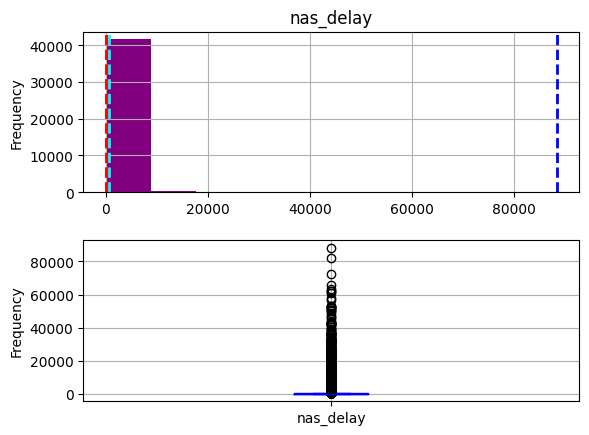

In [ ]:
subplot_function('nas_delay',"nas_delay")

## 4-Data Analysis


#### Q1-Which Airlines has the most delayed flights?

We can group the airline data and calculate the average of delayed flights per airline using the .groupby() method and mean() function

In [ ]:
#put you code below:
df_cleaned.groupby('carrier_name')['arr_del15'].mean().sort_values(ascending=False)

carrier_name
Southwest Airlines Co.     127.741895
American Airlines Inc.      90.818217
United Air Lines Inc.       59.114286
JetBlue Airways             56.828776
Delta Air Lines Inc.        56.527227
Spirit Air Lines            46.170713
Republic Airline            34.889739
SkyWest Airlines Inc.       33.051461
PSA Airlines Inc.           32.399742
Alaska Airlines Inc.        31.467820
Hawaiian Airlines Inc.      26.290323
Mesa Airlines Inc.          23.320392
Envoy Air                   23.282030
Horizon Air                 22.976501
Endeavor Air Inc.           19.188427
Frontier Airlines Inc.      18.742065
ExpressJet Airlines LLC     18.713537
Allegiant Air               15.350775
Name: arr_del15, dtype: float64

we can see how many airlines has been grouped with the function .size():

In [ ]:
#put your code below:
df_copy.groupby('carrier_name').size()

carrier_name
Alaska Airlines Inc.       1849
Allegiant Air              3096
American Airlines Inc.     2569
Delta Air Lines Inc.       3177
Endeavor Air Inc.          2696
Envoy Air                  3645
ExpressJet Airlines LLC    1145
Frontier Airlines Inc.     2489
Hawaiian Airlines Inc.      434
Horizon Air                 383
JetBlue Airways            1536
Mesa Airlines Inc.         2550
PSA Airlines Inc.          2324
Republic Airline           2222
SkyWest Airlines Inc.      6024
Southwest Airlines Co.     2406
Spirit Air Lines           1277
United Air Lines Inc.      2345
dtype: int64

next we calculate the mean of the delayed flights per airline:

In [ ]:
#put you code below:
delayed_flights_mean.mean()


40.93744037547584

each arilines have associated the mean of deyalyed flights.

Let's plot the data using the Matplotlib and Seaborn visualisation libraries:

Always import a library prior to use it (only once in your script!):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

prior any plotting let's sort the data and use a barplot to plot the data to find out which airline has the most delayed flights:

<ipython-input-107-ef4294623ed5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_flights_mean_sorted.index, y=delayed_flights_mean_sorted.values, palette='viridis')


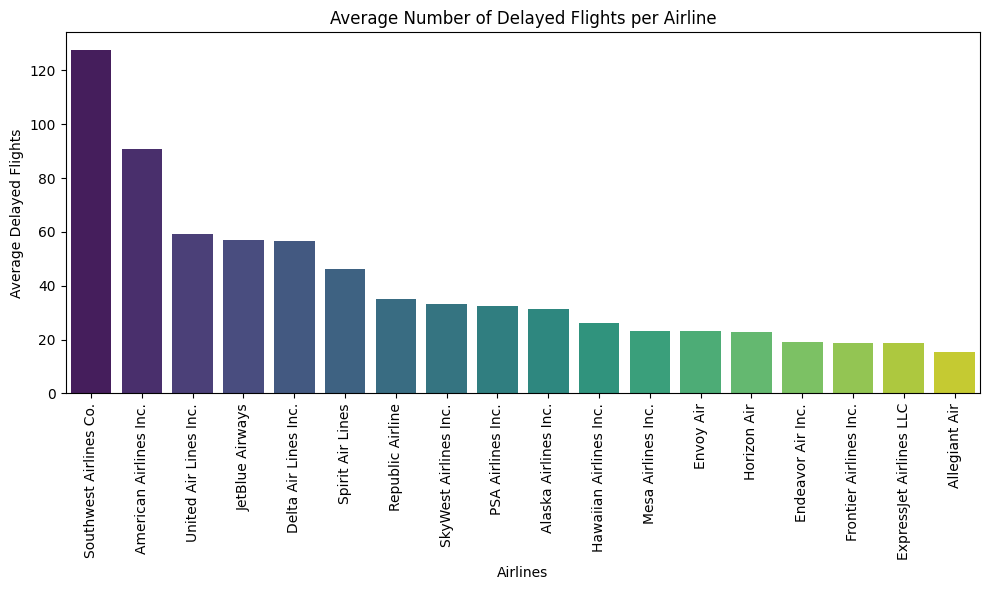

In [ ]:
#put you code below:
# Sorting the data to find out which airline has the most delayed flights
delayed_flights_mean_sorted = delayed_flights_mean.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=delayed_flights_mean_sorted.index, y=delayed_flights_mean_sorted.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Airlines')
plt.ylabel('Average Delayed Flights')
plt.title('Average Number of Delayed Flights per Airline')
plt.tight_layout()
plt.show()

#### Q2-Which Airline is the most affected by both delayed and cancelled flights?

let's use a similar approach as the previous analysis with the groupby() method and ploting the relevant data:

In [ ]:
#put you code below:
affected_airline = df_cleaned.groupby('carrier_name')[['arr_del15', 'arr_cancelled']].sum()
affected_airline['total_delayed_and_cancelled'] = affected_airline['arr_del15'] + affected_airline['arr_cancelled']
most_affected = affected_airline.sort_values(by='total_delayed_and_cancelled', ascending=False).head()
most_affected

,arr_del15,arr_cancelled,total_delayed_and_cancelled
carrier_name,,,
Southwest Airlines Co.,307347.0,100385.0,407732.0
American Airlines Inc.,233312.0,50683.0,283995.0
SkyWest Airlines Inc.,199102.0,37894.0,236996.0
Delta Air Lines Inc.,179587.0,32139.0,211726.0
United Air Lines Inc.,138623.0,28711.0,167334.0


from matplotlib import pyplot as plt
most_affected['arr_del15'].plot(kind='hist', bins=20, title='arr_del15')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_affected['arr_cancelled'].plot(kind='hist', bins=20, title='arr_cancelled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_affected['total_delayed_and_cancelled'].plot(kind='hist', bins=20, title='total_delayed_and_cancelled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_affected.plot(kind='scatter', x='arr_del15', y='arr_cancelled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_affected.plot(kind='scatter', x='arr_cancelled', y='total_delayed_and_cancelled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_affected['arr_del15'].plot(kind='line', figsize=(8, 4), title='arr_del15')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
most_affected['arr_cancelled'].plot(kind='line', figsize=(8, 4), title='arr_cancelled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
most_affected['total_delayed_and_cancelled'].plot(kind='line', figsize=(8, 4), title='total_delayed_and_cancelled')
plt.gca().spines[['top', 'right']].set_visible(False)

Let's investigate what could be the cause of the delayed of that company based on the data we have.

#### Q3-What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

Let's isolate data from the Southwest Airlines Co. to look at the causes. To do this we need to search for the company name in carrier_name column and isolate all columns related to that carrier.

In [ ]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

0        False
1        False
2        False
3        False
4        False
         ...  
42456    False
42457    False
42458    False
42459    False
42460    False
Name: carrier_name, Length: 42167, dtype: bool

In [ ]:
df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

In [ ]:
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,2022-01-01-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,2022-01-01-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,2022-01-01-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,2022-01-01-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,2022-01-01-07


In [ ]:
# To confirm we have well isolated one carrier only:
count=df_SW_airline["carrier_name"].nunique()
print(count)

1


In [ ]:
# To confirm we have well isolated one carrier only- alternative method:
df_SW_airline["carrier_name"].value_counts()

Southwest Airlines Co.    2406
Name: carrier_name, dtype: int64

In [ ]:
df_SW_airline.keys() # same as the .columns attribute

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'date'],
      dtype='object')

In [ ]:
df_SW_subset=df_SW_airline[["carrier_delay","weather_delay","nas_delay","security_delay"]] # We are selecting only the columns related to causes of delay

In [ ]:
df_SW_subset.head()

,carrier_delay,weather_delay,nas_delay,security_delay
1409,4255.0,66.0,720.0,60.0
1410,2147.0,126.0,116.0,19.0
1411,1033.0,35.0,128.0,0.0
1412,16615.0,1812.0,6030.0,52.0
1413,16714.0,1228.0,4232.0,234.0


In [ ]:
sum_data=df_SW_subset.sum()
sum_data

carrier_delay     5518974.0
weather_delay      441728.0
nas_delay         2542425.0
security_delay      48830.0
dtype: float64

In [ ]:
sum_df= sum_data.to_frame()
sum_df

,0
carrier_delay,5518974.0
weather_delay,441728.0
nas_delay,2542425.0
security_delay,48830.0


In [ ]:
sum_df=sum_df.rename(columns={0: 'causes'})
sum_df

,causes
carrier_delay,5518974.0
weather_delay,441728.0
nas_delay,2542425.0
security_delay,48830.0


from matplotlib import pyplot as plt
sum_df['causes'].plot(kind='hist', bins=20, title='causes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sum_df['causes'].plot(kind='line', figsize=(8, 4), title='causes')
plt.gca().spines[['top', 'right']].set_visible(False)

plot the data to reply to the question

#### Q4-What are the main cause of flights cancellation and delays among the different airlines?

Use previous function and visualisation library to reply to this question

In [ ]:
#put you code below:
causes_data = df_cleaned.groupby('carrier_name')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']].sum()
causes_data

,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,
Alaska Airlines Inc.,905195.0,84391.0,871300.0,23237.0
Allegiant Air,1223522.0,250510.0,593754.0,15160.0
American Airlines Inc.,6211644.0,890388.0,3127509.0,44734.0
Delta Air Lines Inc.,5167489.0,659732.0,2824764.0,24570.0
Endeavor Air Inc.,1358910.0,305060.0,895897.0,2426.0
Envoy Air,1236874.0,571728.0,1434445.0,7362.0
ExpressJet Airlines LLC,526801.0,59085.0,660966.0,0.0
Frontier Airlines Inc.,916230.0,79218.0,818692.0,0.0
Hawaiian Airlines Inc.,318611.0,15908.0,6426.0,3400.0
